In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
import hvplot.pandas


import warnings
warnings.filterwarnings('ignore')

In [43]:
from MCForecastTools import MCSimulation

ModuleNotFoundError: No module named 'MCForecastTools'

In [3]:
# Create empty disctionary of user's portfolio for analisys 
portfolio = {}

# Get portfolio tickers and shares from a user, defined period user analysis and fetch closing prices for a portfolio.
# Run Infinite loop "while True" to get as much stock tickers as user wishes to analysis and break when finished "Done". 
# Use input function for user interactions 
while True:
    
#The use of upper() in the provided code is to convert the user-inputted stock symbol to uppercase letters.
    stock = input("Enter a stock symbol (or 'done' to finish): ").upper() 
    if stock == 'DONE':
        break
    quantity = float(input(f"Enter the quantity of {stock}: "))
    portfolio[stock] = quantity

# Locate and convert the ".keys()" and ".values()" in dictionary to the list.
portfolio_tickers = list(portfolio.keys())
stock_shares = list(portfolio.values())

# Create empty disctionaty for historical_data to save all downloaded data.
# Run "for" loop to iterate through each stock ticker in the list and download closing data in defined period of time.
historical_data = {}
for stock_symbol in portfolio.keys():
    stock_data = yf.download(stock_symbol, period="5y")
    historical_data[stock_symbol] = stock_data['Close']


Enter a stock symbol (or 'done' to finish):  btc-usd
Enter the quantity of BTC-USD:  .1
Enter a stock symbol (or 'done' to finish):  cost
Enter the quantity of COST:  20
Enter a stock symbol (or 'done' to finish):  aapl
Enter the quantity of AAPL:  50
Enter a stock symbol (or 'done' to finish):  msft
Enter the quantity of MSFT:  10
Enter a stock symbol (or 'done' to finish):  amzn
Enter the quantity of AMZN:  20
Enter a stock symbol (or 'done' to finish):  sq
Enter the quantity of SQ:  100
Enter a stock symbol (or 'done' to finish):  v
Enter the quantity of V:  4
Enter a stock symbol (or 'done' to finish):  xom
Enter the quantity of XOM:  30
Enter a stock symbol (or 'done' to finish):  done


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [45]:
def portfolio_value(portfolio_tickers, stock_shares):
    try:
        # Download historical stock prices
        data = yf.download(portfolio_tickers, period="1d")['Close']
        
        # Get the latest prices
        current_prices = data.iloc[-1]
        
        # Calculate the value of each stock
        stock_values = current_prices * pd.Series(portfolio)
        
        # Calculate the total portfolio value
        portfolio_value = stock_values.sum()
        
        return portfolio_value
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

# Calculate portfolio value
current_portfolio_value = portfolio_value(portfolio_tickers, stock_shares)

# Display the current portfolio value
print(f"\nCurrent Portfolio Value: ${current_portfolio_value:.2f}")

[*********************100%%**********************]  8 of 8 completed

Current Portfolio Value: $45820.93


[*********************100%%**********************]  8 of 8 completed


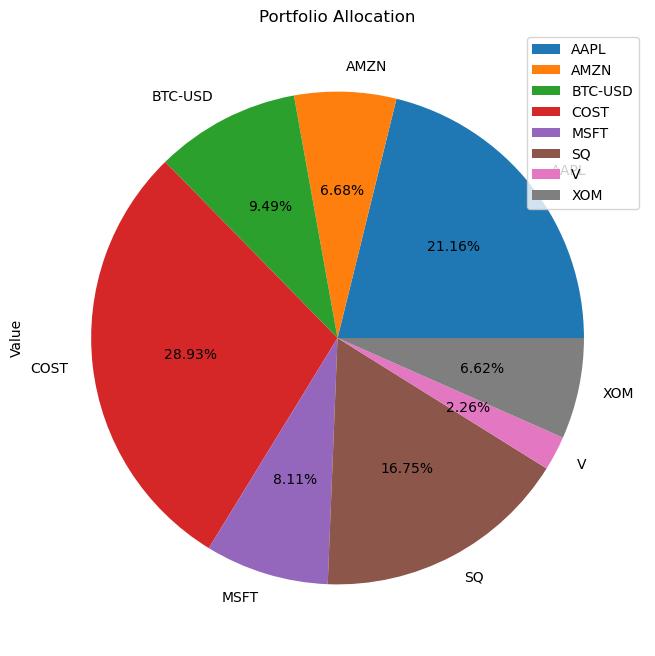

In [46]:
# Fetch stocks closing prices in the portfolio for period of one day .
data = yf.download(portfolio_tickers, period="1d")['Close'] 
current_prices = data.iloc[-1]

# Locate shares owned and calculate current values of each stock in the portfolio.
stock_shares = pd.Series(stock_shares, index=portfolio_tickers)
each_stock_value = pd.DataFrame((current_prices * stock_shares).round(2))

# Calculate percentage of each stock in the portfolio.
percentage_of_portfolio = ((each_stock_value / current_portfolio_value) * 100).round(2)

# Combine stocks values and percetage allocation in to one dataframe, define columns name and plot pie chart.
portfolio_summary = pd.concat([each_stock_value, percentage_of_portfolio], axis=1)
portfolio_summary.columns = ['Value', 'Percentage']
portfolio_summary.plot.pie(y='Value', 
                           autopct='%1.2f%%', 
                           title="Portfolio Allocation", 
                           figsize=(8, 8))
plt.legend(loc='upper right')

# Save plot in the images folder.
plt.savefig('images/portfolio_allocation.png')

In [6]:
# Fetch the closing data for Sp 500, Define period you wish to work with.
sp500_data = yf.download('^GSPC',  period="5y") 
sp500_closing_prices = sp500_data['Close']

# Convert to pandas DataFrame, Rename cloumn name to SP500.
sp500_closing_prices = pd.DataFrame(sp500_closing_prices)
sp500_closing_prices.columns = ['SP500']

#  Calculate daily retuns of the Market and drop na.
sp500_returns = sp500_closing_prices.pct_change().dropna()

# Convert historical data of portfolio to pandas DataFrame and Calculate daily retuns of portfolio and drop na. 
historical_data = pd.DataFrame(historical_data)
portfolio_returns = historical_data.pct_change().dropna()

# Combine market and portfolio returns to one DataFrame.
combined_returns = pd.merge(sp500_returns, portfolio_returns, on='Date')
combined_returns

[*********************100%%**********************]  1 of 1 completed


,SP500,BTC-USD,COST,AAPL,MSFT,AMZN,SQ,V,XOM
Date,,,,,,,,,
2018-12-24,-0.027112,0.019910,-0.023288,-0.025874,-0.041739,-0.024313,-0.034089,-0.020361,-0.038315
2018-12-26,0.049594,0.010957,0.045476,0.070422,0.068310,0.094452,0.090694,0.069827,0.047779
2018-12-27,0.008563,-0.052489,0.012334,-0.006490,0.006166,-0.006295,0.015004,0.013668,0.004371
2018-12-28,-0.001242,0.073624,0.004774,0.000512,-0.007808,0.011207,-0.004987,-0.008105,-0.011169
2018-12-31,0.008492,-0.031881,0.008266,0.009665,0.011754,0.016204,0.003938,0.007637,0.000293
...,...,...,...,...,...,...,...,...,...
2023-12-15,-0.000076,-0.025433,0.044453,-0.002726,0.013117,0.017298,-0.007357,-0.002706,-0.006694
2023-12-18,0.004528,0.030434,0.034031,-0.008503,0.005179,0.027339,-0.004447,0.001318,0.007433
2023-12-19,0.005866,-0.008282,-0.005138,0.005360,0.001637,-0.001817,0.046427,0.006270,0.013182


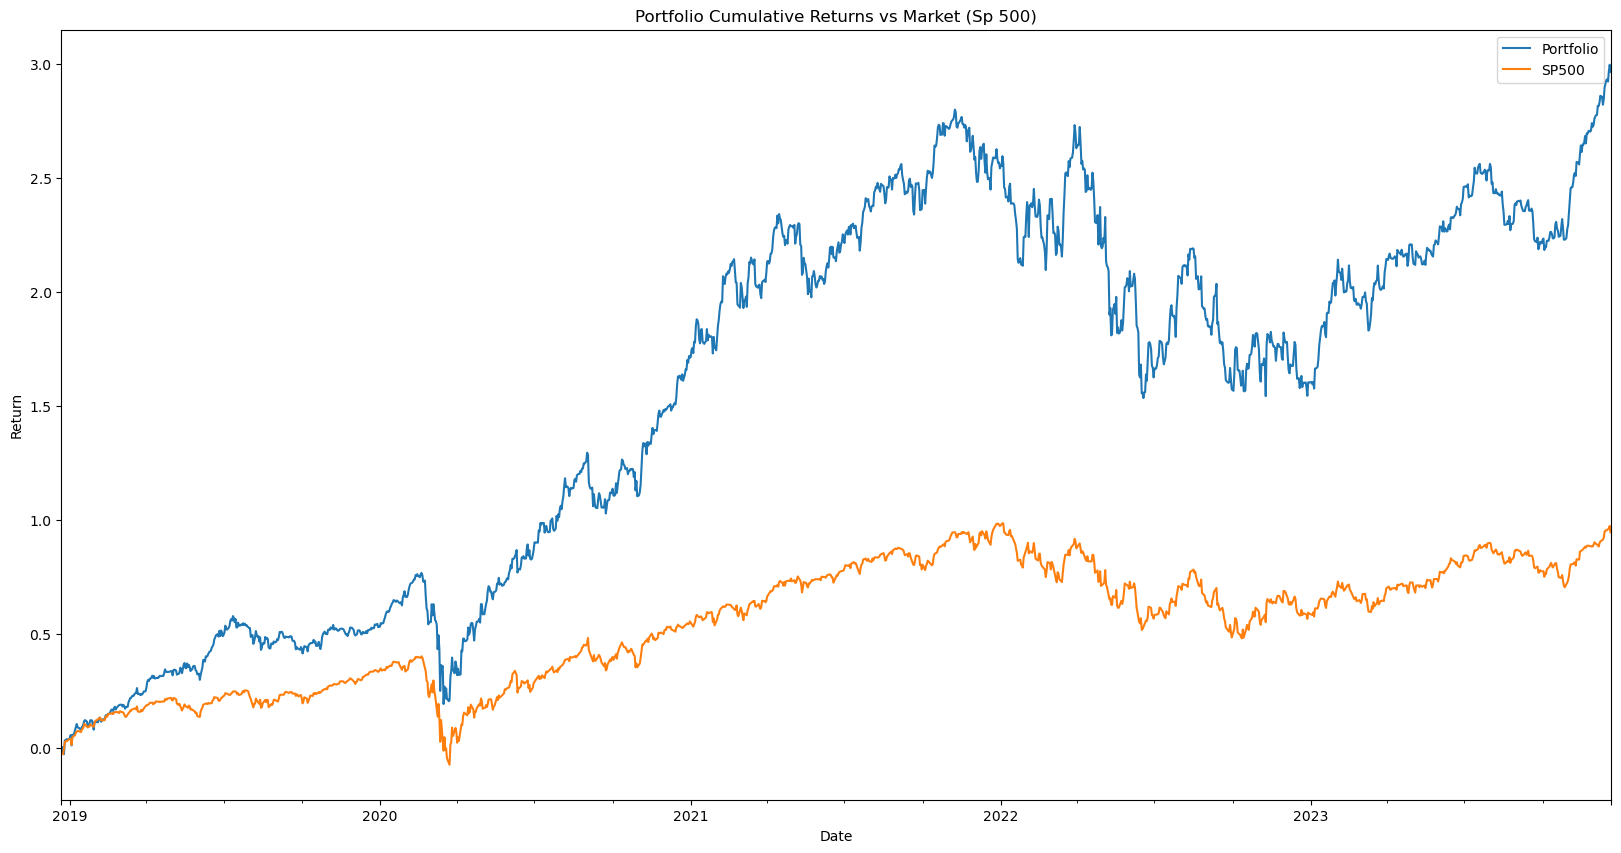

In [47]:
# Sum the average returns of the portfolio and calculate cumulative returns of the portfolio and then plot it.
portfolio_average_returns = portfolio_returns.mean(axis=1)
portfolio_cumulative_returns = (1 + portfolio_average_returns).cumprod() - 1
ax = portfolio_cumulative_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Portfolio Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
# Calculate cumulative returns of th market and plot it against our portfolio.
spy500_cumulative_returns = (1 + sp500_returns).cumprod() - 1
spy500_cumulative_returns.plot(ax=ax, label='SP500', legend=True)

# Save plot in the images folder.
plt.savefig('images/cumulative_returns.png')

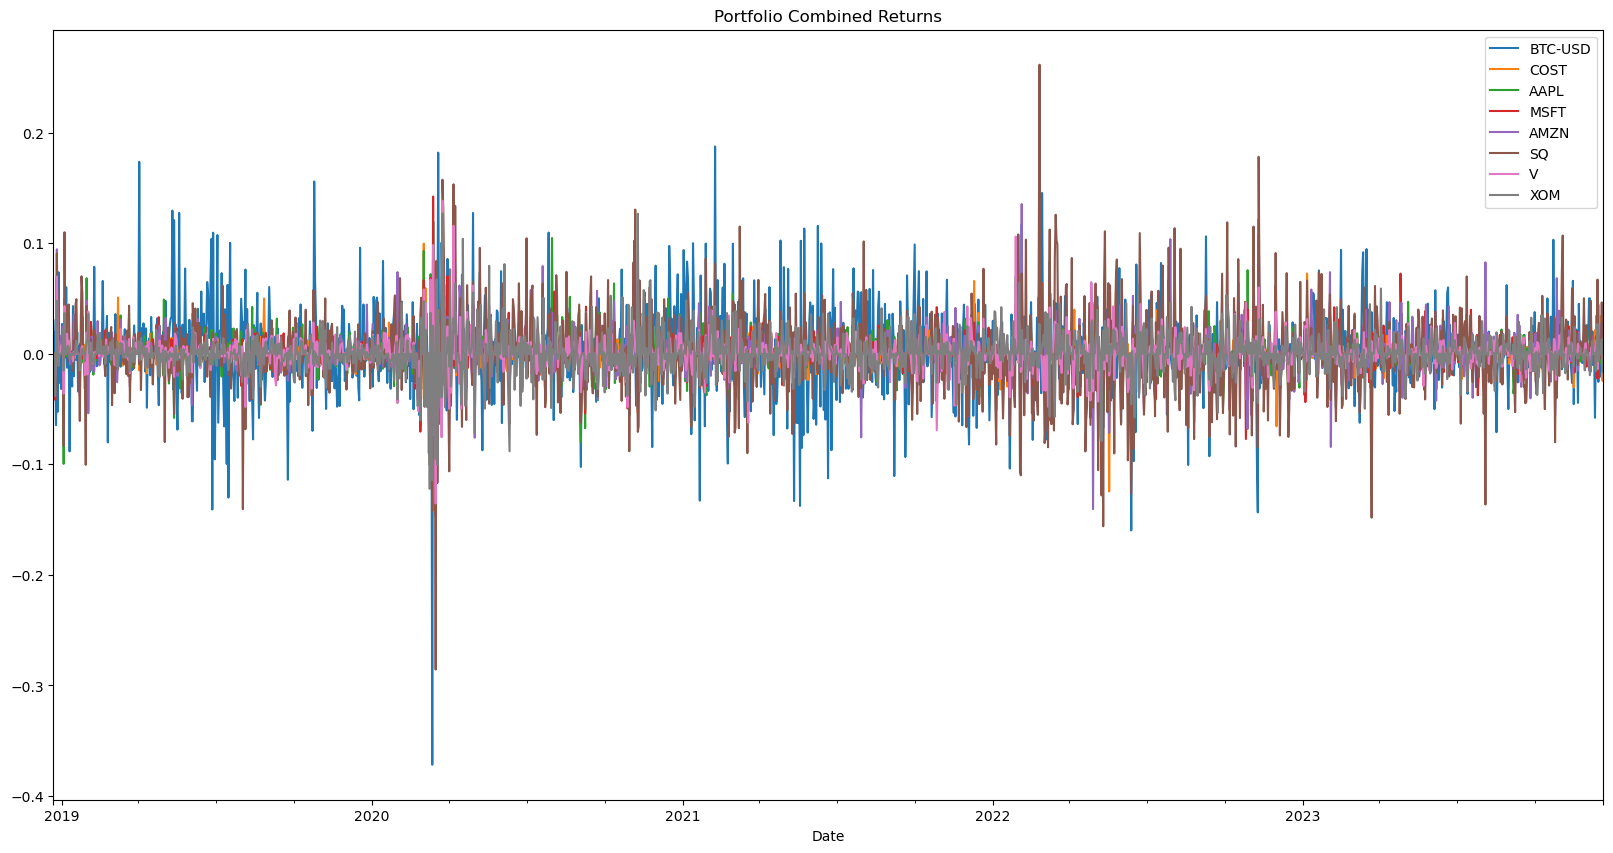

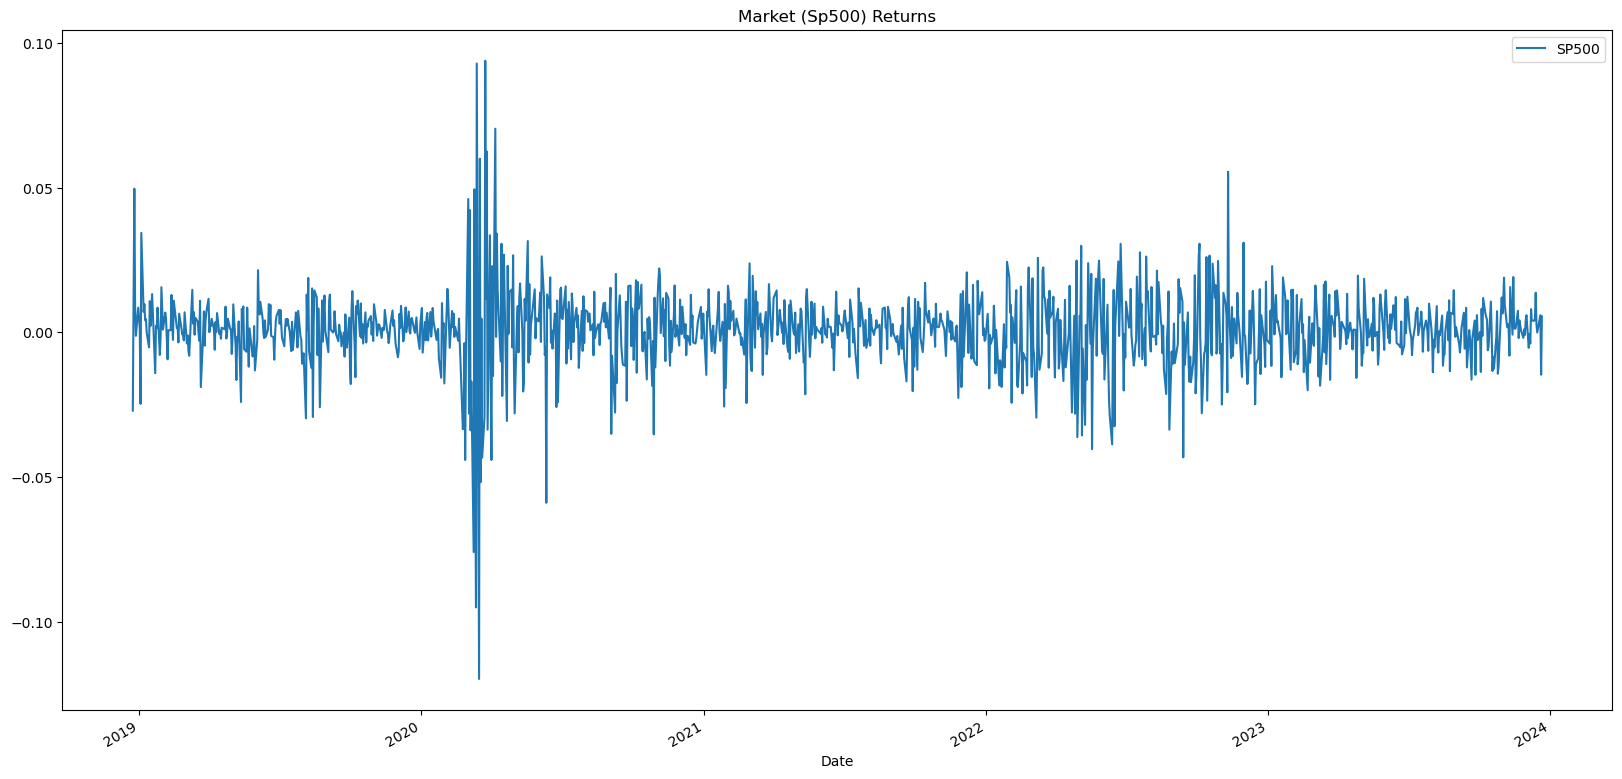

In [48]:
portfolio_returns.plot(figsize=(20,10),title='Portfolio Combined Returns', legend=True)
sp500_returns.plot(figsize=(20,10),title='Market (Sp500) Returns', legend=True)
plt.savefig('images/portfolio_returns.png')
plt.savefig('images/sp500_returns.png')

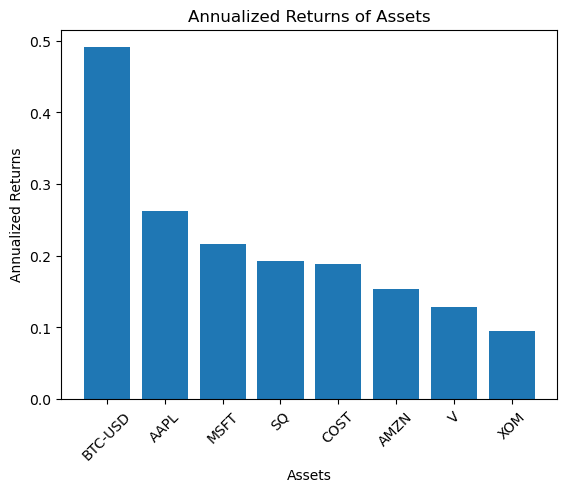

In [9]:
# define the risk free rate
risk_free_rate = 0.04/252 # annualized yield of 3-month Treasury bill divided by 252 trading days

# calculate the excess returns of each stock in the portfolio
excess_returns = portfolio_returns * stock_shares - risk_free_rate


# Calculate the annual returns
annual_daily_returns = portfolio_returns.mean() * 252
annual_excess_returns = excess_returns.mean() * 252

# Calculate the daily standard deviations
portfolio_returns_std = portfolio_returns.std()

# CAluculating the excess returns
excess_returns_std = excess_returns.std()


######### annual STD

# Calculate the annualized standard deviation (252 trading days)
stock_annualized_std = portfolio_returns_std * np.sqrt(252)
portfolio_annualized_std = excess_returns_std * np.sqrt(252)

# Calculate the stock risk
annual_stock_risk = portfolio_returns_std * math.sqrt(252)
annual_excess_risk = excess_returns_std * math.sqrt(252)

# Sorted the data in decending order
sorted_annual_returns = annual_daily_returns.sort_values(ascending=False)
sorted_annual_excess_returns = annual_excess_returns.sort_values(ascending=False)


# plot the sorted annualized returns of stock
plt.bar(sorted_annual_returns.index, sorted_annual_returns)
plt.ylabel("Annualized Returns")
plt.xlabel('Assets')
plt.xticks(rotation=45)
plt.title('Annualized Returns of Assets')
plt.savefig('images/annualized_returns.png')

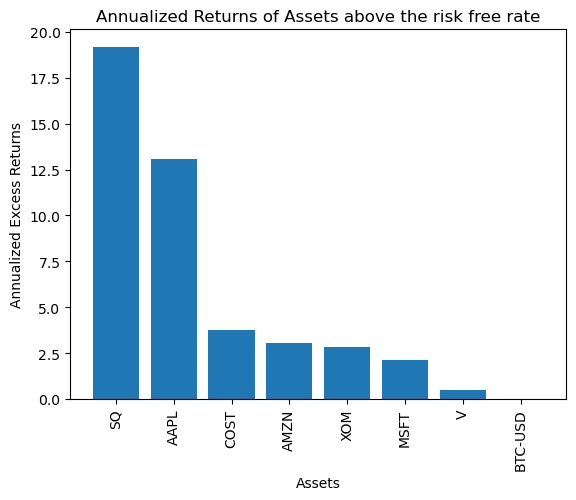

In [10]:
# Plot of the excess annual returns
# plot the sorted annualized returns of stock
plt.bar(sorted_annual_excess_returns.index, sorted_annual_excess_returns)
plt.ylabel("Annualized Excess Returns")
plt.xlabel('Assets')
plt.xticks(rotation=90)
plt.title('Annualized Returns of Assets above the risk free rate')
plt.show()

In [11]:
# creat a dataframe to store the annual returns, annual risks, annual excess returns and company ticker and new column for the ratio

risk_df = pd.DataFrame()
risk_df['Expected Annual Returns'] = annual_daily_returns
risk_df['Expected Annual Risk'] = annual_stock_risk
risk_df['Expected Annual Excess Returns'] = annual_excess_returns
risk_df['Stock'] = portfolio_tickers
risk_df['Ratio'] = risk_df['Expected Annual Returns'] / risk_df['Expected Annual Risk']

# show in decending order for the expected annual returns
risk_df.sort_values(by="Ratio", axis = 0, ascending=False, inplace=False)

,Expected Annual Returns,Expected Annual Risk,Expected Annual Excess Returns,Stock,Ratio
AAPL,0.262464,0.269139,13.083181,AAPL,0.975199
COST,0.188744,0.197964,3.734880,COST,0.953428
BTC-USD,0.490885,0.556438,0.009089,BTC-USD,0.882193
MSFT,0.216174,0.255059,2.121736,MSFT,0.847544
V,0.128603,0.234374,0.474411,V,0.548707
AMZN,0.153562,0.294656,3.031250,AMZN,0.521158
SQ,0.192252,0.528442,19.185158,SQ,0.363808
XOM,0.095701,0.286488,2.831019,XOM,0.334048


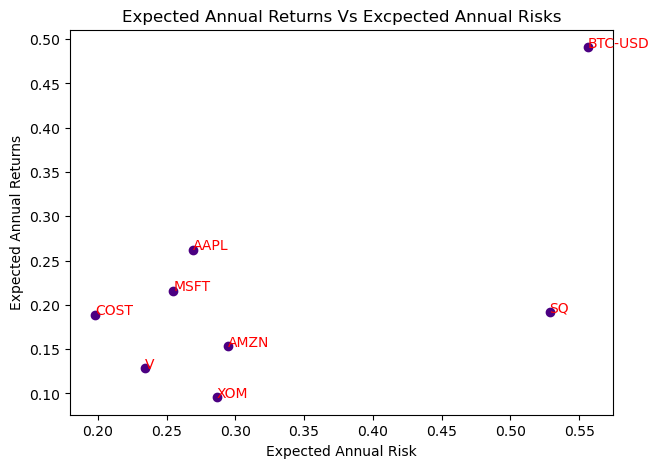

In [44]:
# visually show the ecpected annual returns vs the expected annual risk
risk_df.hvplot.bar()

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Expected Annual Returns Vs Excpected Annual Risks')
ax.scatter(risk_df['Expected Annual Risk'], risk_df['Expected Annual Returns'], c = "indigo")
ax.set_xlabel('Expected Annual Risk')
ax.set_ylabel('Expected Annual Returns')
          
# note the points on plot
for idx, row in risk_df.iterrows():
    ax.annotate(row["Stock"], (row['Expected Annual Risk'], row['Expected Annual Returns']), c = 'red')
plt.savefig('images/portfolio_risk_return.png')

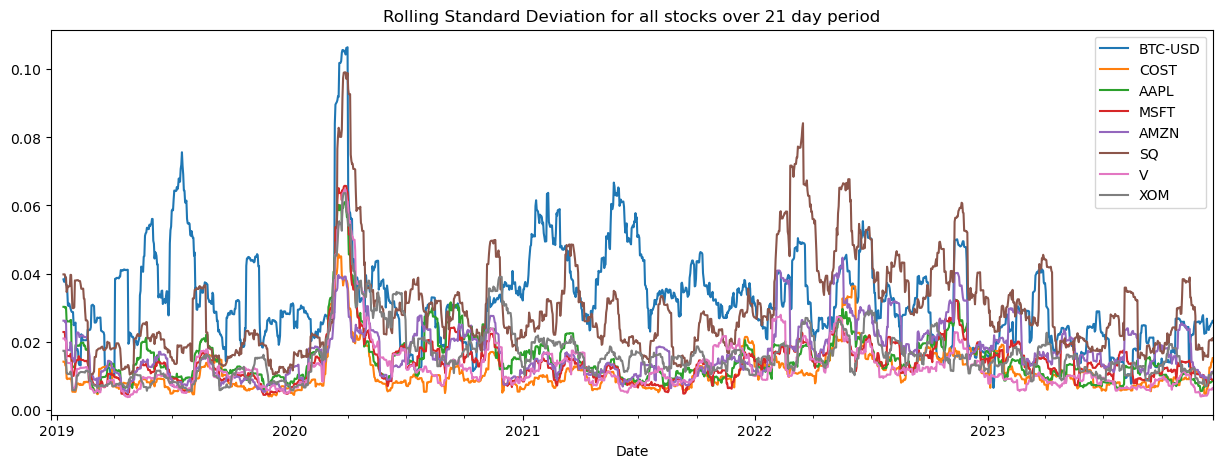

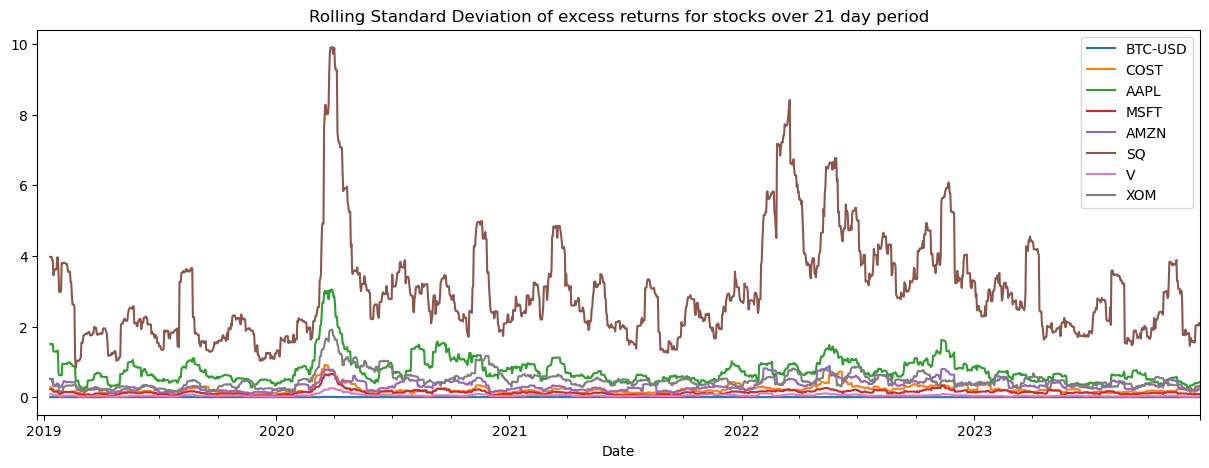

In [13]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_returns.rolling(window=21).std()
excess_rolling_std = excess_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation for all stocks over 21 day period')
# Plotting excess
excess_rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation of excess returns for stocks over 21 day period')
plt.savefig('images/standard_deviation.png')
plt.savefig('images/excess_return.png')

In [50]:
# calculte the sharpe ratio -- sharpe ratio lower than 1 is bad, 1 is ok, 3 is the best
sharpe_ratio = np.sqrt(252) * portfolio_returns / portfolio_returns_std

# calculating the sharpe ratio of our excess returns
sharpe_ratio_portfolio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

# plot the stocks sharpe ratio
sharpe_ratio.hvplot.bar().opts(yformatter='%.0f',
                                      active_tools=[])

:Bars   [Date,Variable]   (value)

<Axes: title={'center': 'Portfolio Correlation vs SP 500'}>

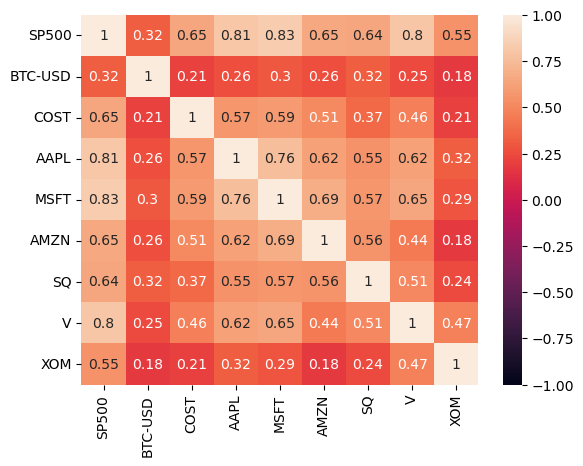

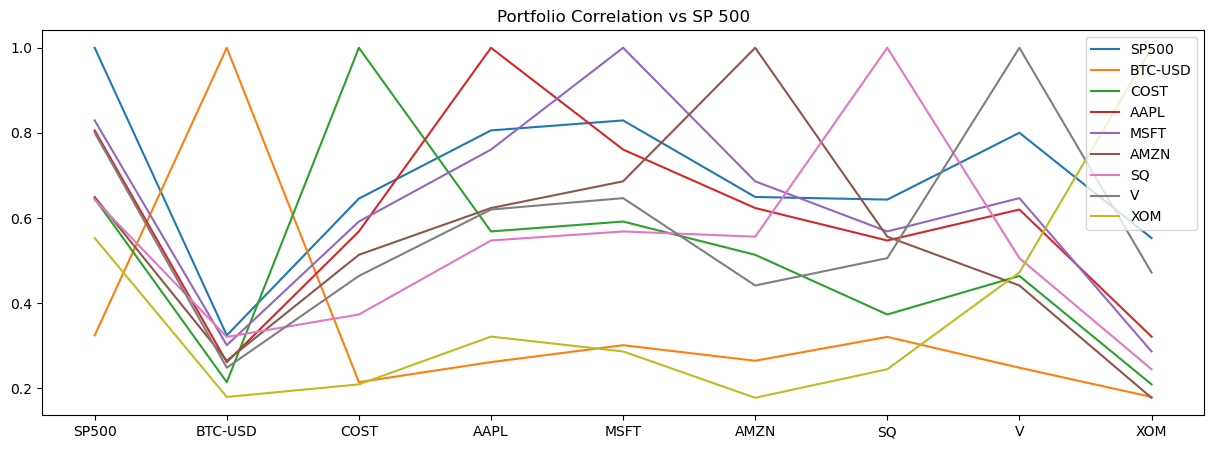

In [25]:
# Calculate the correlation
correlation_matrix = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
correlation_matrix.plot(figsize=(15,5), title='Portfolio Correlation vs SP 500')

In [26]:
portfolio_weights = [(percentage / 100) for percentage in portfolio_summary['Percentage'].tolist()]
portfolio_weights

[0.21170000000000003,
 0.0668,
 0.09519999999999999,
 0.2891,
 0.08109999999999999,
 0.1672,
 0.0226,
 0.0663]

In [27]:
stock_weights = portfolio_summary['Percentage'].tolist()
stock_weights

[21.17, 6.68, 9.52, 28.91, 8.11, 16.72, 2.26, 6.63]

In [87]:
each_stock_value

,0
AAPL,1958.90
AMZN,3081.40
COST,15668.52
SQ,2955.20
V,5167.40
XOM,1219.80


In [28]:
num_sims = 500

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation(
    portfolio_data = historical_data,
    weights = portfolio_weights,
    num_simulation = num_sims,
    num_trading_days = 252*30
)
MC_30years

NameError: name 'MCSimulation' is not defined